# Generating Random Samples
## Direct Method
1. $\text{Let } U \sim Unif(0,1)$
2. $\text{Set } X = F^{-1}(U)$. Then X has CDF F
3. $P(X \leq x) = P(F^{-1}(U) \leq x) = P(U \leq F(x)) = F(x)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, expon, gamma, beta, norm

In [2]:
n = 100_000
lambda_value = 1
a = 10
b = 15

UNIF = uniform()
EXP = expon(scale = lambda_value)
GAMMA = gamma(n)
BETA = beta(a,b)

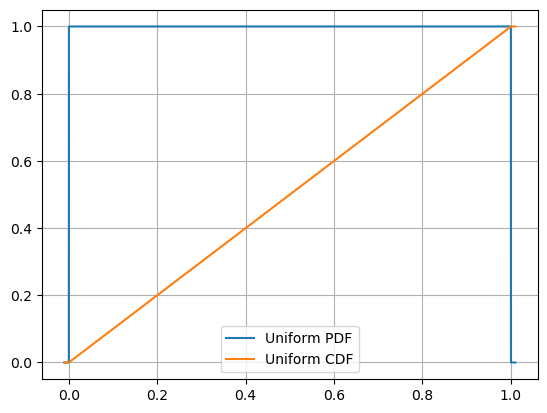

In [3]:
u = np.linspace(-0.01, 1.01, n)
plt.grid()
plt.plot(u, UNIF.pdf(u), label = 'Uniform PDF') # Plotting PDF
plt.plot(u, UNIF.cdf(u), label = 'Uniform CDF')
plt.legend()

### Example: Exponential Distribution ($exp(\lambda)$)
$$F(x) = 1 - e^{-\lambda x}$$
So -
$$X = F^{-1}(U) = -\frac{1}{\lambda}\log(1-U) \sim Exp(\lambda)$$

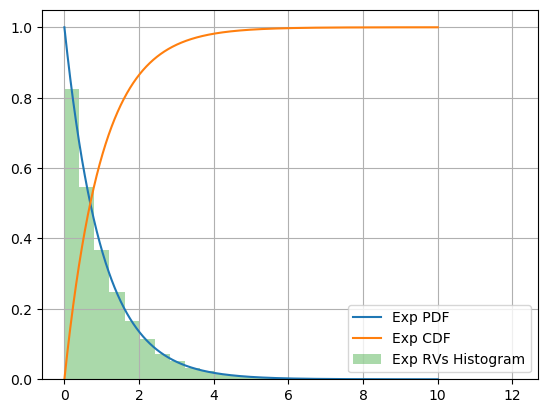

In [4]:
e = np.linspace(0, 10, n)
exp_rvs = EXP.rvs(n)
plt.grid()
plt.plot(e, EXP.pdf(e), label = 'Exp PDF') # Plotting PDF
plt.plot(e, EXP.cdf(e), label = 'Exp CDF')
plt.hist(exp_rvs, density = True, alpha = 0.4, bins = 30, label = 'Exp RVs Histogram')
plt.legend()

In [5]:
def exp_inv_fn(u):
    return -(1/lambda_value)*np.log(1 - u)

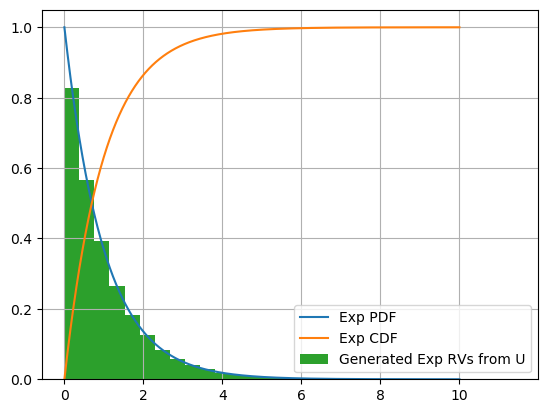

In [6]:
unif_rvs = UNIF.rvs(n)
exp_inv_rvs = exp_inv_fn(unif_rvs)
plt.grid()
plt.plot(e, EXP.pdf(e), label = 'Exp PDF') # Plotting PDF
plt.plot(e, EXP.cdf(e), label = 'Exp CDF')
plt.hist(exp_inv_rvs, density=True, bins =  30, label = 'Generated Exp RVs from U')
plt.legend()

$$X = F^{-1}(U) = -\frac{1}{\lambda}\log(1-U) = -\frac{1}{\lambda}\log(U) \sim Exp(\lambda)$$
We can do this, since sampling from (1-u) is the *same* as sampling from u because -
- $u \in [0,1]$
- $u$ is symmetric about $0.5$

In [7]:
def exp_inv_fn2(u):
    return -(1/lambda_value)*np.log(u)

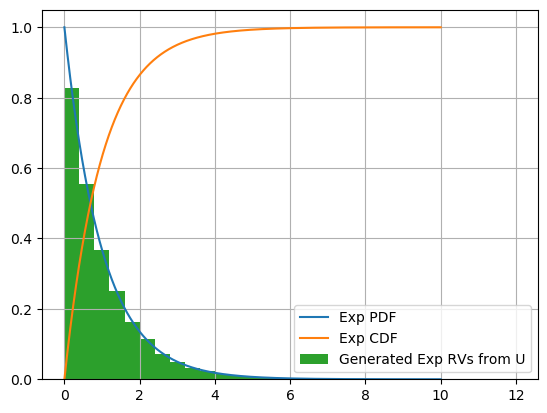

In [8]:
unif_rvs = UNIF.rvs(n)
exp_inv_rvs = exp_inv_fn2(unif_rvs)
plt.grid()
plt.plot(e, EXP.pdf(e), label = 'Exp PDF') # Plotting PDF
plt.plot(e, EXP.cdf(e), label = 'Exp CDF')
plt.hist(exp_inv_rvs, density=True, bins =  30, label = 'Generated Exp RVs from U')
plt.legend()

## Sampling from continuous distributions
### Accept-Reject Algorithm
Taking distributions which has a non zero value only between [0,1]. Let $c$ be the maximum value of PDF

$$P(V \leq y, U \leq \frac{1}{c}f(V)) = \int_0^y \int_0^{f_X(v)/c}du.dv$$
$$= \frac{1}{c}\int_0^y f_X(v)dv = \frac{1}{c}P(X \leq y)$$

Taking y = 1, we get: $P(U \leq \frac{1}{c}f(V)) = \frac{1}{c}$

Replacing this in the previous equation, we get -

$P(X \leq y) = \frac{P(V \leq y, U \leq \frac{1}{c}f(V))}{P(U \leq \frac{1}{c}f(V))}$

$$\therefore P(X \leq y) = P(V \leq y, U \leq \frac{1}{c}f(V)|U \leq \frac{1}{c}f(V))$$

Hence the **algorithm** is as follows -
1. Generate $(U,V)$ i.i.d. $\sim Unif(0,1)$ 
2. If $U \leq \frac{1}{c}f (V) \rightarrow$  Set $X = V$
3. Else go to step 1.

Basically, if $U \leq \frac{1}{c}f(V)$ is true, the above expression reduces to $P(V \leq y) = P(X \leq y)$. Hence, when the condition is met, set $X = V$

### E.g. Beta

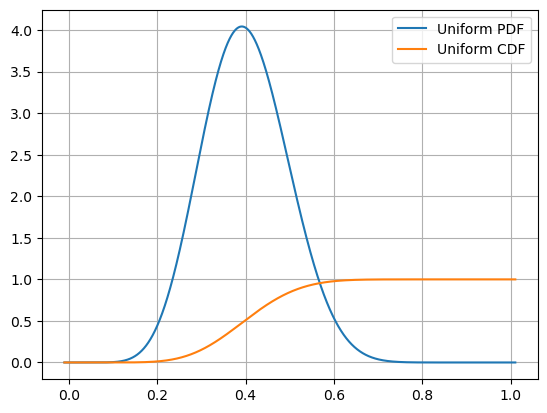

In [9]:
u = np.linspace(-0.01, 1.01, n)
plt.grid()
plt.plot(u, BETA.pdf(u), label = 'Uniform PDF') # Plotting PDF
plt.plot(u, BETA.cdf(u), label = 'Uniform CDF')
plt.legend()

In [10]:
c = np.max(BETA.pdf(u))
c

4.0436088761899

In [11]:
X = []
rej_count = 0
for i in range(n):
    # Step 1
    u, v = UNIF.rvs(2) # Sampling 2 RVs - U, V
    # Step 2
    f = BETA.pdf
    if(u <= (1/c)*f(v)):
        X.append(v)
    else:
        rej_count+=1

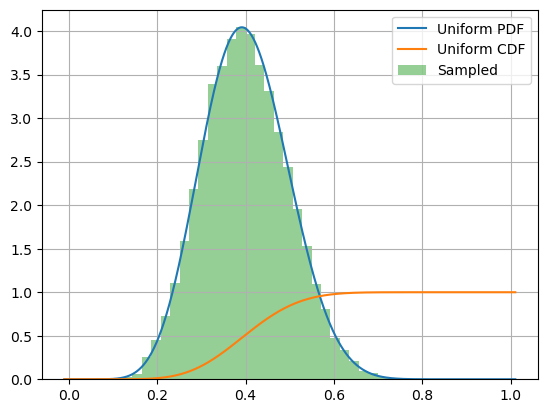

In [12]:
u = np.linspace(-0.01, 1.01, n)
plt.grid()
plt.plot(u, BETA.pdf(u), label = 'Uniform PDF') # Plotting PDF
plt.plot(u, BETA.cdf(u), label = 'Uniform CDF')
plt.hist(X, bins = 30, density=True, label = 'Sampled', alpha = 0.5)
plt.legend()

In [13]:
print(f'Sample Acceptance Rate = {rej_count/n*100:.2f}%')

Sample Acceptance Rate = 75.16%


For a general case of PDF extending to all real values instead of [0,1], replace $c$ with $M$, where $M$ is -
$$M = \max_y \frac{f(y)}{f_V(y)} < \infty \text{ (assume)}$$

The main changes are -
1. Sample $U \sim Unif(0,1)$ and $V \sim f_V$ independently 
2. If $U \leq \frac{1}{M}f (V) \rightarrow$  Set $X = V$

Think in this way that we flip the graph and model a uniform distribution at every point, accept it if lies below the PDF else reject. Use the images for better understanding. Some points -
- $f(x)$ is the distribution we want to model
- $g(x)$ is the auxilliary function ($f_V(x)$ in the above equation). 
- $C$ is the same as $M$ in the above equation, to scale the $f_V$ PDF to be ALWAYS greater than equal to $f$ at every point
<p align="center">
<img src="../images/Accept-Reject Algorithm 1.png" style="width:600px;height:400px;">
</p>
<p align="center">
<img src="../images/Accept-Reject Algorithm 2.png" style="width:600px;height:400px;">
</p>

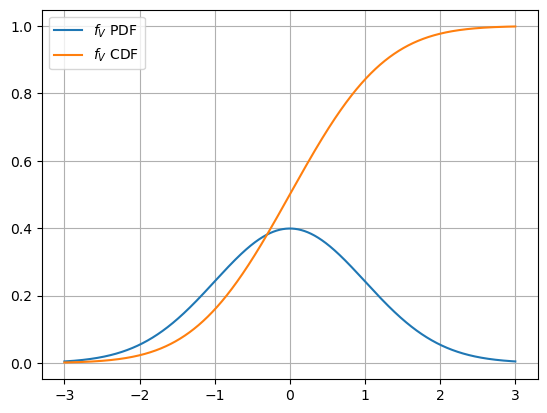

In [14]:
GAUSSIAN = norm(0,1) # Normal/Gaussian distribution

u = np.linspace(-3, 3, n)
plt.grid()
plt.plot(u, GAUSSIAN.pdf(u), label = f'$f_V$ PDF') # Plotting PDF
plt.plot(u, GAUSSIAN.cdf(u), label = f'$f_V$ CDF')
plt.legend()

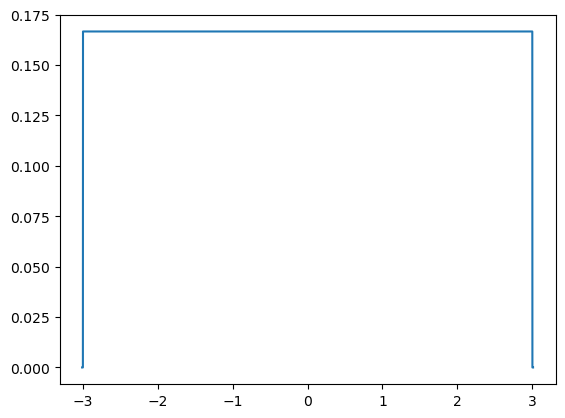

In [15]:
UNIF_V = uniform(-3, 6)
v = np.linspace(-3.01, 3.01, n)
plt.plot(v, UNIF_V.pdf(v))

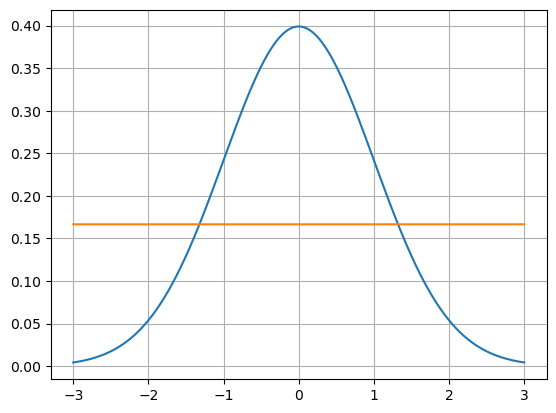

In [16]:
v = np.linspace(-3, 3, n)
plt.grid()
plt.plot(u, GAUSSIAN.pdf(u), label = 'Uniform PDF') # Plotting PDF
plt.plot(v, UNIF_V.pdf(v))

In [17]:
f = GAUSSIAN.pdf
f_v = UNIF_V.pdf
M = np.max(f(u)/f_v(u))

In [18]:
X = []
rej_count = 0
for i in range(n):
    # Step 1
    u = UNIF.rvs(1)[0] # Sampling 2 RVs - U, V
    v = UNIF_V.rvs(1)[0]
    # Step 2
    f = GAUSSIAN.pdf
    f_v = UNIF_V.pdf
    if(u <= (1/M)*f(v)):
        X.append(v)
    else:
        rej_count+=1

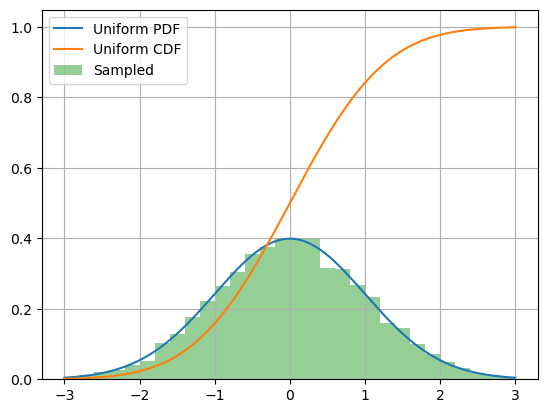

In [19]:
# u = np.linspace(-0.01, 1.01, n)
v = np.linspace(-3, 3, n)
plt.grid()
plt.plot(v, GAUSSIAN.pdf(v), label = 'Uniform PDF') # Plotting PDF
plt.plot(v, GAUSSIAN.cdf(v), label = 'Uniform CDF')
plt.hist(X, bins = 30, density=True, label = 'Sampled', alpha = 0.5)
plt.legend()

In [20]:
print(f'Sample Acceptance Rate = {rej_count/n*100:.2f}%')

Sample Acceptance Rate = 93.03%


But sampling v from uniform distribution is extremely slow and unoptimized, as the *rejection* region is generally > *acceptance* region. Instead maybe fitting **another** distribution which is easier to sample from and reduces the rejection region, will be a more optimized way to sample. ($f_V$ function where $v$ is sampled from, is called the **envelope**)
<p align="center">
<img src="../images/Accept-Reject Algorithm 3.png" style="width:600px;height:400px;">
</p>
<p align="center">
<img src="../images/Accept-Reject Algorithm 4.png" style="width:600px;height:400px;">
</p>
<p align="center">
In the example above, the acceptance region is grate when a Gaussian is fitted, and hence, it is more optimized
</p>

Let $f_V = Gaussian(0.5,3)$  

In [21]:
F_V = norm(0.5, 3)

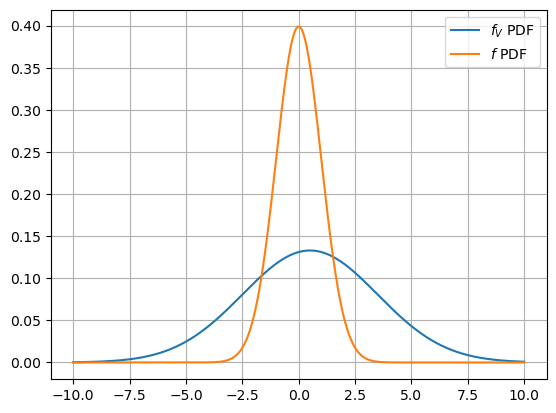

In [22]:
u = np.linspace(-10, 10, n)
plt.grid()
plt.plot(u, F_V.pdf(u), label = f'$f_V$ PDF') # Plotting PDF
# plt.plot(u, F_V.cdf(u), label = f'$f_V$ CDF')
plt.plot(u, GAUSSIAN.pdf(u), label = f'$f$ PDF') # Plotting PDF
# plt.plot(u, GAUSSIAN.cdf(u), label = f'$f$ CDF')
plt.legend()

In [23]:
f = GAUSSIAN.pdf
f_v = F_V.pdf
M = np.max(f(u)/f_v(u))
M

3.047243125759528

In [24]:
X = []
rej_count = 0
for i in range(n):
    # Step 1
    u = UNIF.rvs(1)[0] # Sampling 2 RVs - U, V
    v = UNIF_V.rvs(1)[0]
    # Step 2
    f = GAUSSIAN.pdf
    f_v = UNIF_V.pdf
    if(u <= (1/M)*f(v)): # To ensure f(v) is between 0 to 1, with f(v) being 1 at the point where f(v)/f_V(v) is maximum
        X.append(v)
    else:
        rej_count+=1

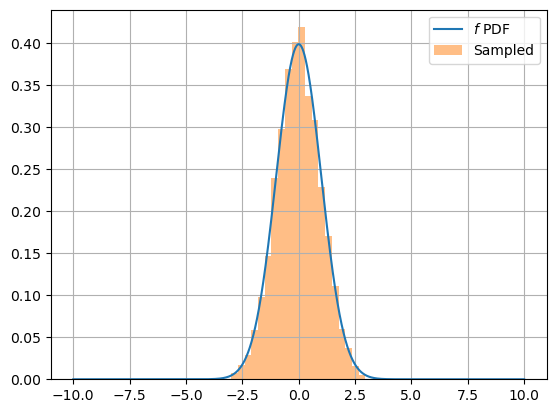

In [25]:
u = np.linspace(-10, 10, n)
plt.grid()
plt.plot(u, GAUSSIAN.pdf(u), label = f'$f$ PDF') # Plotting PDF
# plt.plot(u, GAUSSIAN.cdf(u), label = f'$f$ CDF')
plt.hist(X, bins = 20, density=True, label = 'Sampled', alpha = 0.5)
plt.legend()

In [26]:
print(f'Sample Acceptance Rate = {rej_count/n*100:.2f}%')

Sample Acceptance Rate = 94.51%


We can see that the sample acceptance rate is GREATER for the gaussian, hence gaussian is more optimized for $f_V$. (Although there will be better $f_V$ distributions with higher acceptance rate than the one we chose as an example)